## Библиотеки

In [1]:
import os
import torch

import dataset.classify_dataset as class_ds
import dataset.default_augmentations as def_augs
import dataset.test_dataset as test_cl_ds

from models.triplet_loss import TripletLossModel, ClassificationForTLModel
import model_test.classify_model_test as class_m_test
from model_selection.metrics import CustomAccuracy

In [2]:
datasets_path = 'G:\\diplom\\project\\triplet_loss_project_2_06.04\\data'
train_ds_path = os.path.join(datasets_path, 'sampled_train_marks_models')
test_ds_path = os.path.join(datasets_path, 'sampled_test')

In [3]:
def marks_indx_f(x):
    return (x[0],)


def models_indx_f(x):
    return (x[0], x[1])

## 1. Модель классификации

**Тест датасета**

In [4]:
classif_ds_train = class_ds.TLClassifyDataset(
    train_ds_path, marks_indx_f, crop=False,
    transform=def_augs.clTL_train_augs_128
)

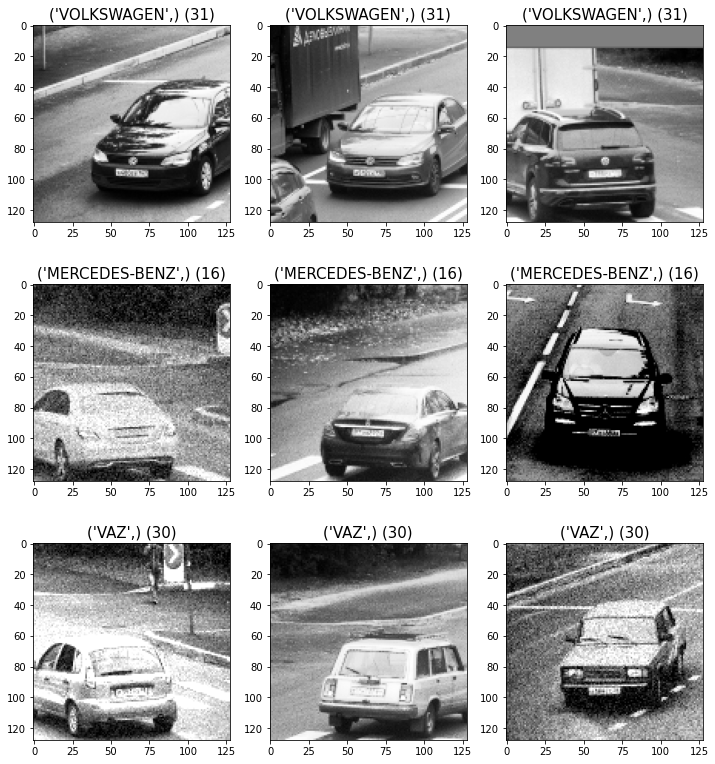

In [5]:
test_cl_ds.classify_ds_test(classif_ds_train, n_rows=3,
                            lines_span=1.5, figsize_sq=3)

**Тест модели**

In [6]:
mark_classes_n = len(classif_ds_train.labels_code)
class_mark_model = ClassificationForTLModel(mark_classes_n)

Визуальный:

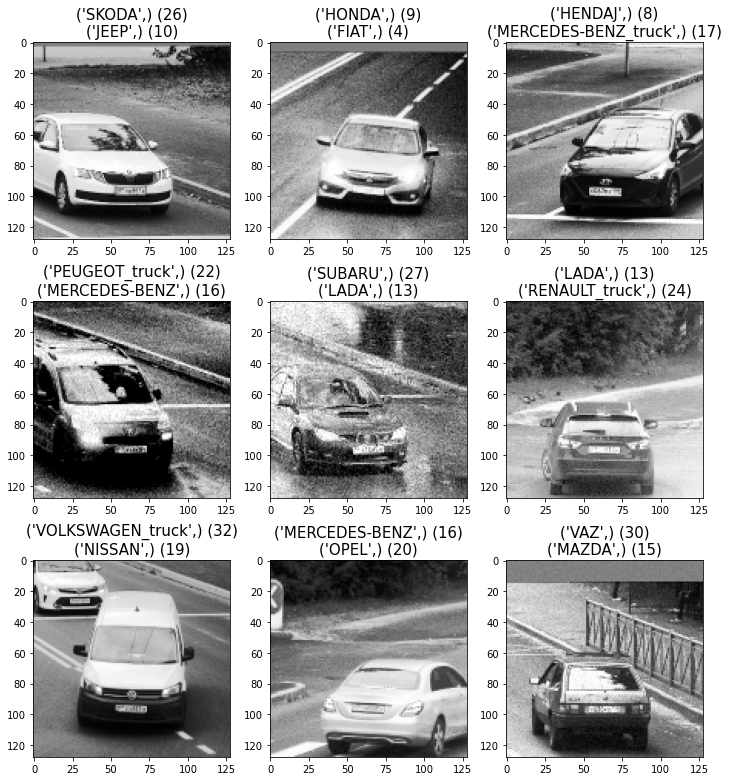

In [7]:
t = class_m_test.test_classif_model(class_mark_model,
                                    classif_ds_train,
                                    n_rows=4)

test_cl_ds.classify_ds_test(classif_ds_train, n_rows=3,
                            lines_span=1.5, figsize_sq=3,
                            imgs_indexes=t[0], add_to_title=t[1])

Accuracy

f1 score